In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64

from matplotlib.pyplot import subplots, show
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
# Name of MDS procedures and number of dimensions to check stress-1
list_procedures = ("classic", "dissim", "SMACOF-euclidean", "SMACOF-dissim", "SMACOF-euclidean-classic", "SMACOF-dissim-classic")
list_dimensions = list(range(1, 7))

# SMACOF hyperpameters
max_iters = 1000
eps = 1e-6

# Time Series Clustering through MDS class instance
TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)

### Exploración de métodos MDS

classic with 1 components has a stress-1 value of 0.319060
classic with 2 components has a stress-1 value of 0.210939
classic with 3 components has a stress-1 value of 0.146892
classic with 4 components has a stress-1 value of 0.117247
classic with 5 components has a stress-1 value of 0.093229
classic with 6 components has a stress-1 value of 0.083672
dissim with 1 components has a stress-1 value of 0.319060
dissim with 2 components has a stress-1 value of 0.210939
dissim with 3 components has a stress-1 value of 0.146892
dissim with 4 components has a stress-1 value of 0.117247
dissim with 5 components has a stress-1 value of 0.093229
dissim with 6 components has a stress-1 value of 0.083672
breaking at iteration 84 with stress 554049716.7383729
breaking at iteration 121 with stress 553355400.2228899
breaking at iteration 129 with stress 554985002.1917788
breaking at iteration 147 with stress 554175615.8848914
SMACOF-euclidean with 1 components has a stress-1 value of 0.483785
breakin

/home/fsamaniego/Documents/CIMAT/Tesis/ClusterTIDs/scripts/subscripts/MDS.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  Figure, Subplot = subplots(nrows = 1, ncols = 1, figsize = (6, 6))


SMACOF-dissim with 3 components has a stress-1 value of 0.064417
breaking at iteration 6 with stress 391468916.00816125
SMACOF-dissim with 4 components has a stress-1 value of 0.048034
SMACOF-dissim with 5 components has a stress-1 value of 0.041397
SMACOF-dissim with 6 components has a stress-1 value of 0.038141
breaking at iteration 55 with stress 121503542.48567049
SMACOF-euclidean-classic with 1 components has a stress-1 value of 0.226697
breaking at iteration 491 with stress 24915998.154665917
SMACOF-euclidean-classic with 2 components has a stress-1 value of 0.102657
SMACOF-euclidean-classic with 3 components has a stress-1 value of 0.060230
SMACOF-euclidean-classic with 4 components has a stress-1 value of 0.046914
SMACOF-euclidean-classic with 5 components has a stress-1 value of 0.040837
SMACOF-euclidean-classic with 6 components has a stress-1 value of 0.037506
breaking at iteration 55 with stress 121503542.48567164
SMACOF-dissim-classic with 1 components has a stress-1 value

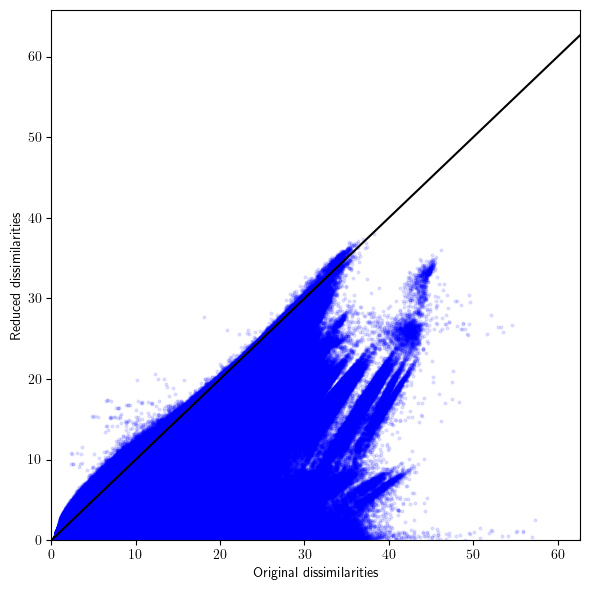

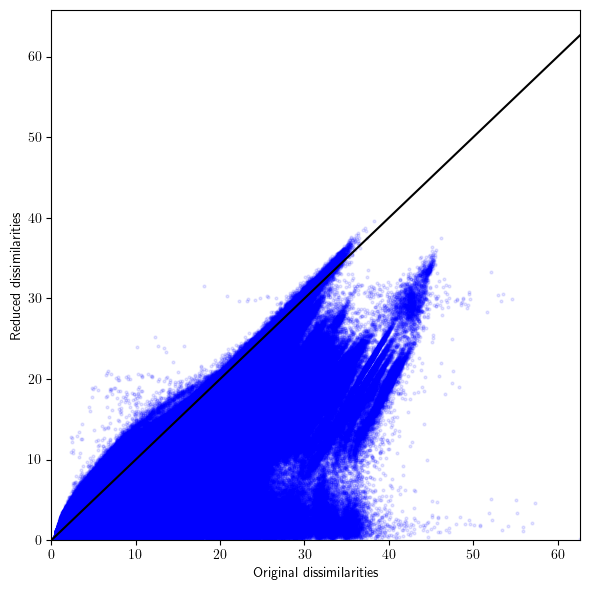

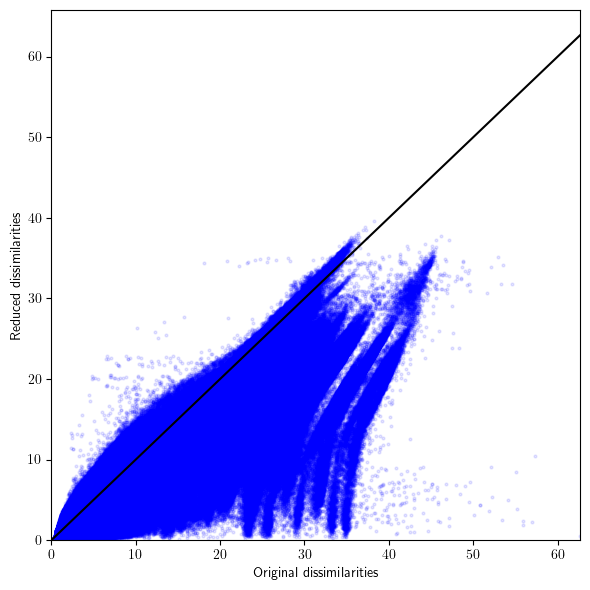

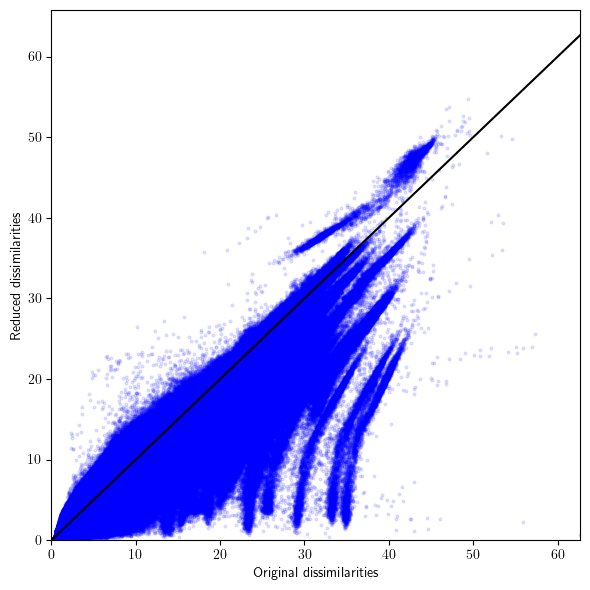

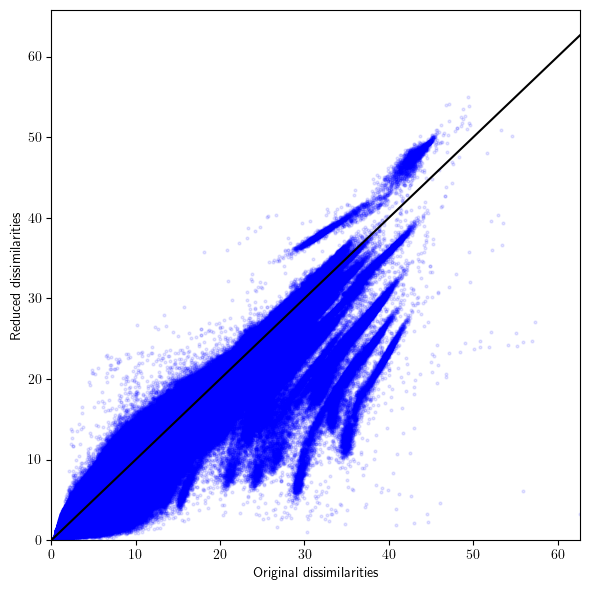

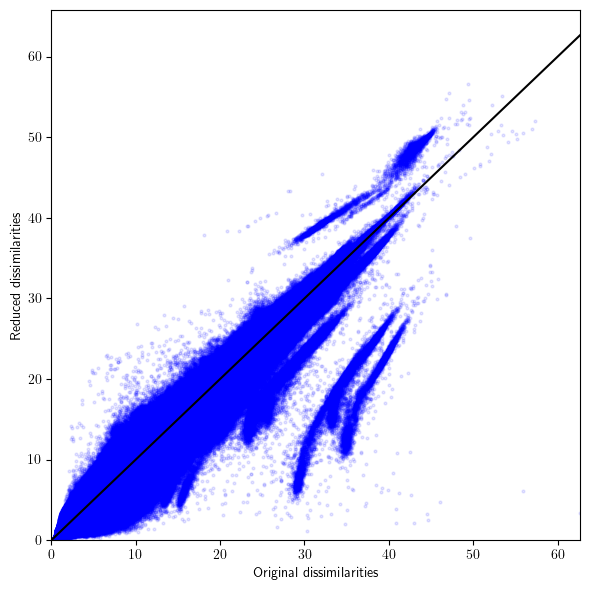

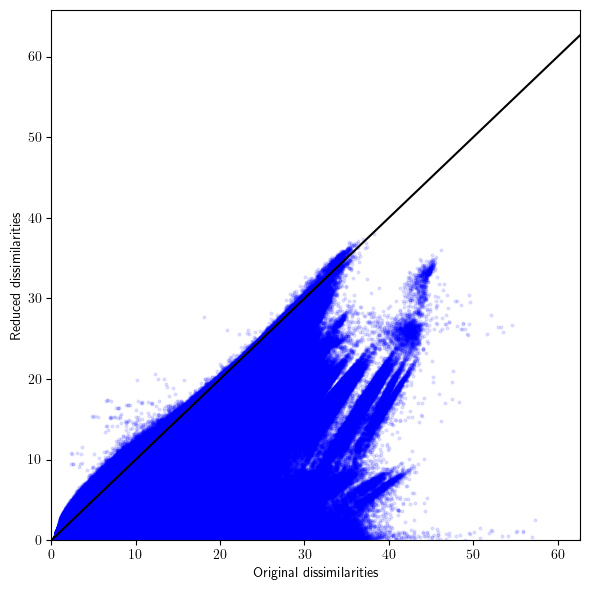

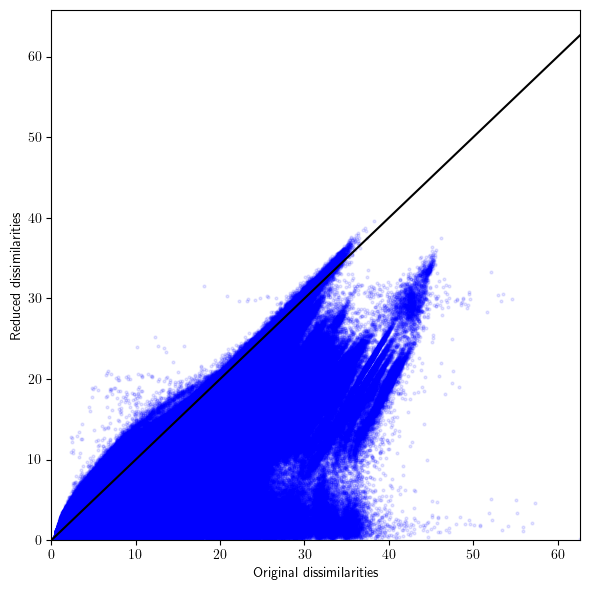

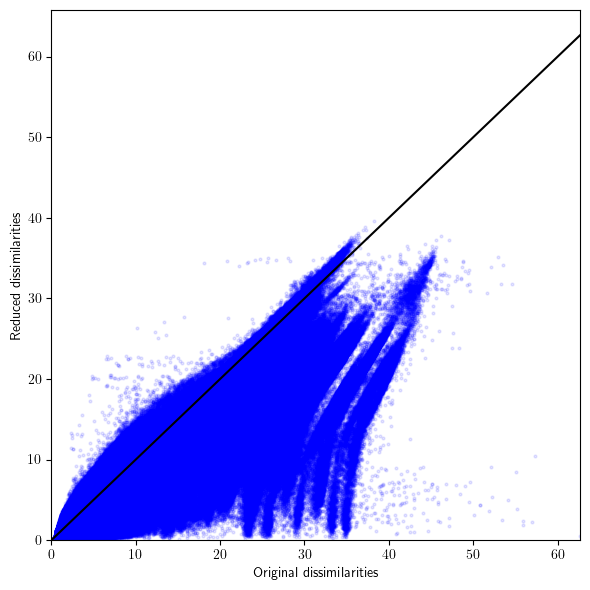

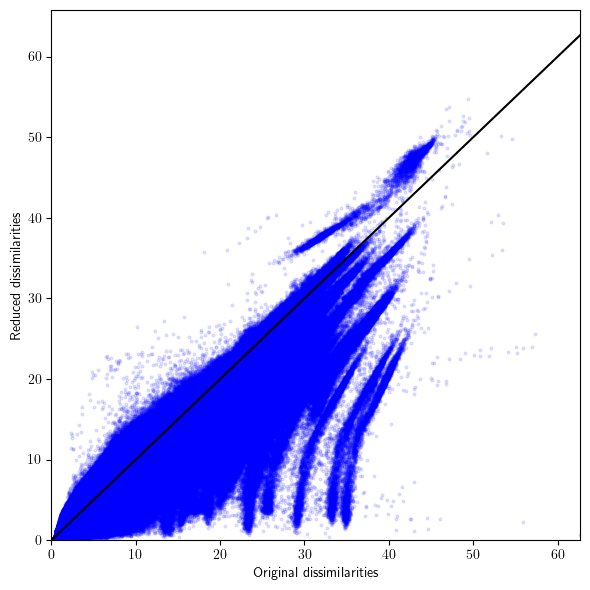

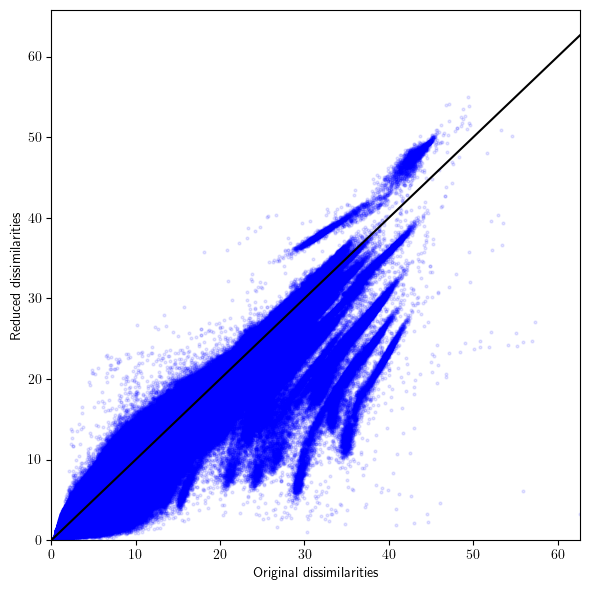

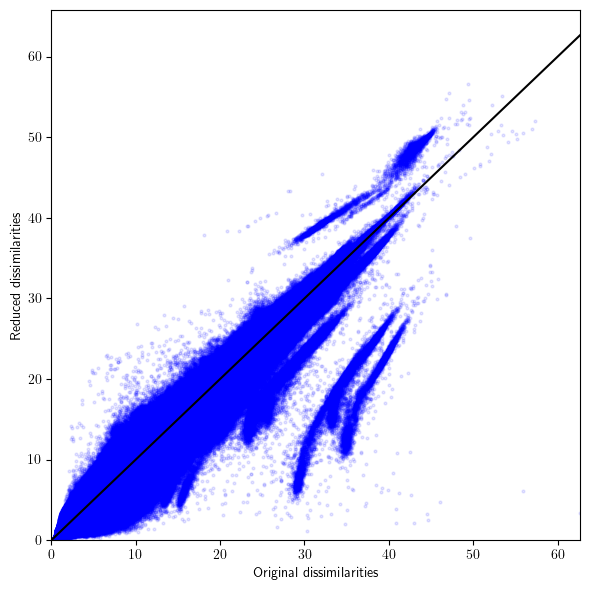

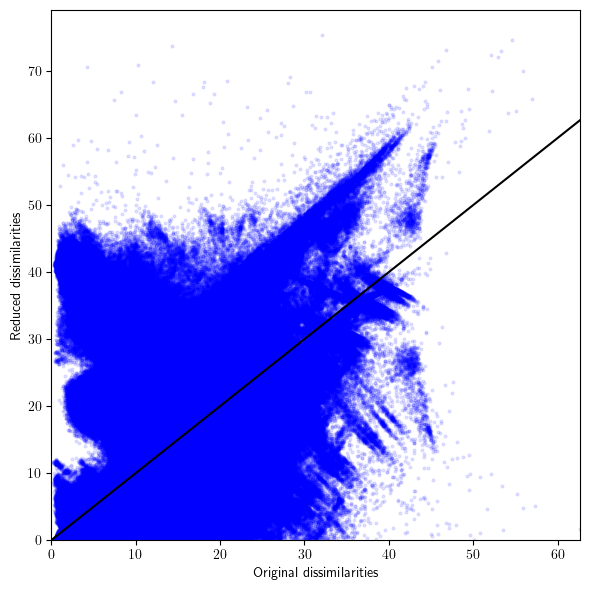

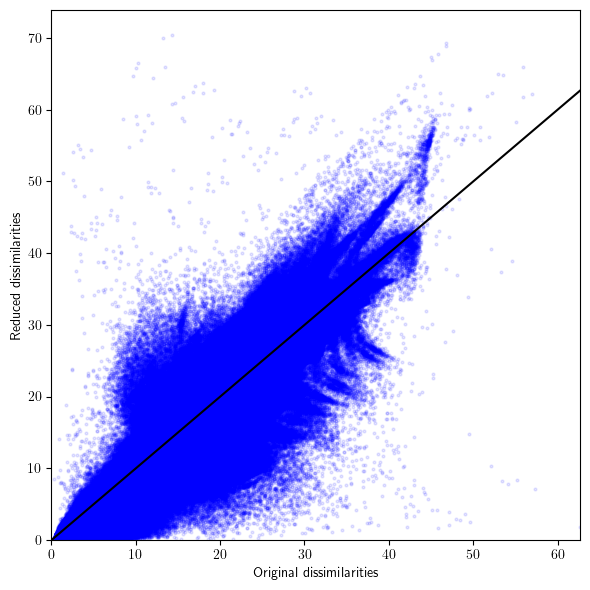

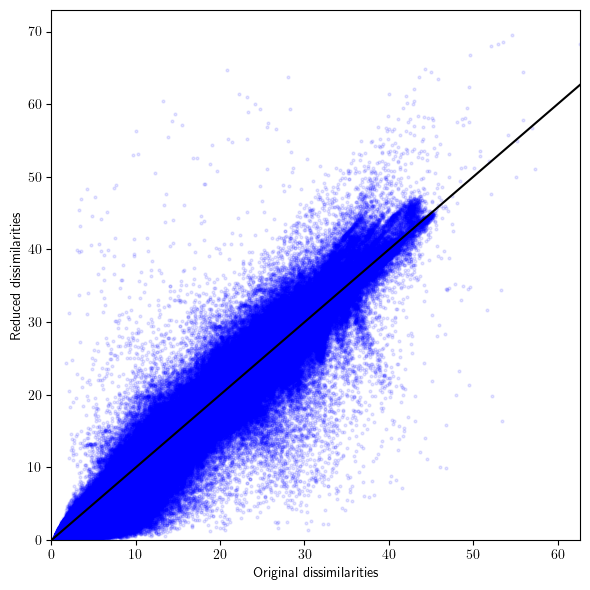

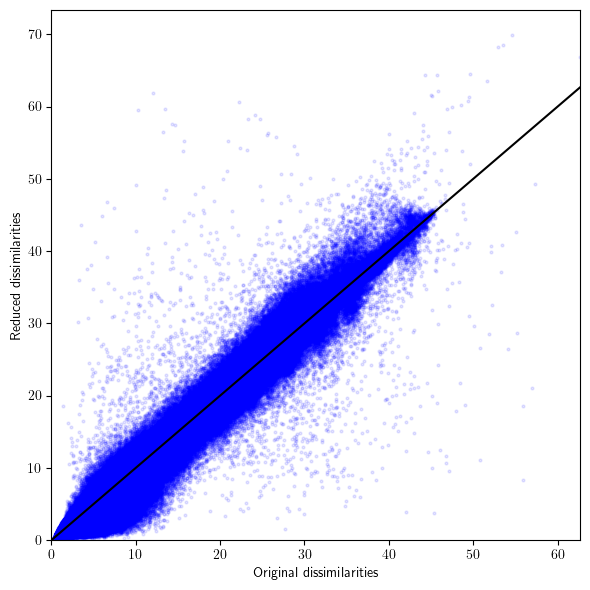

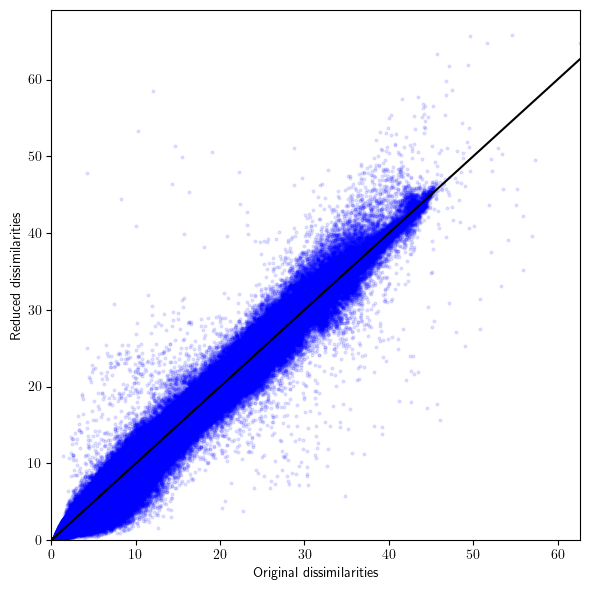

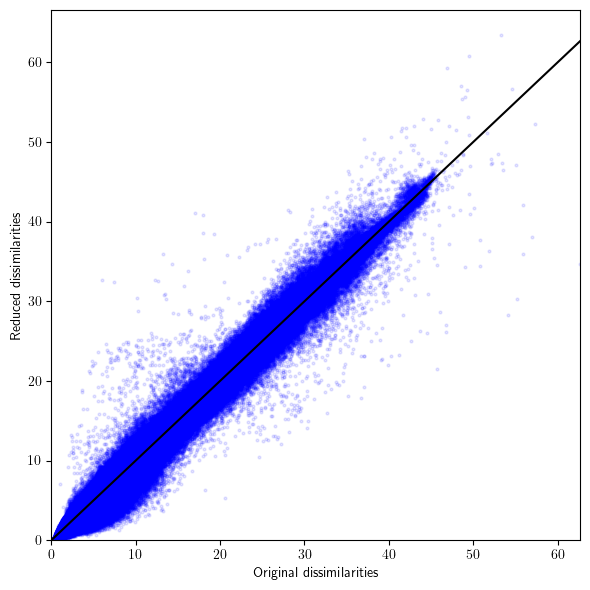

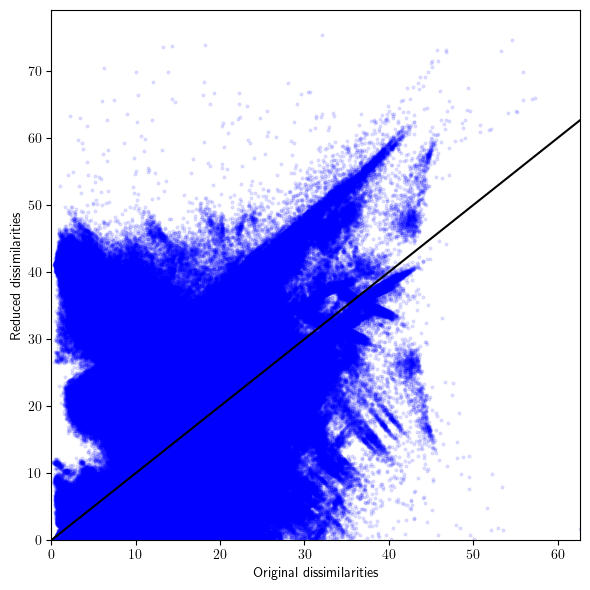

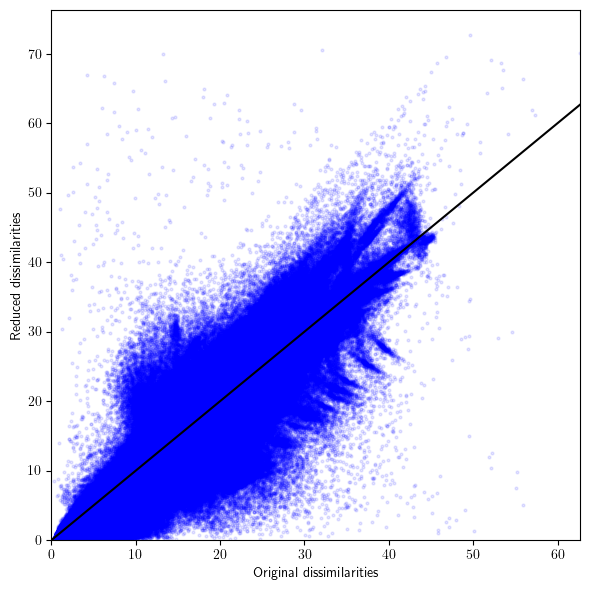

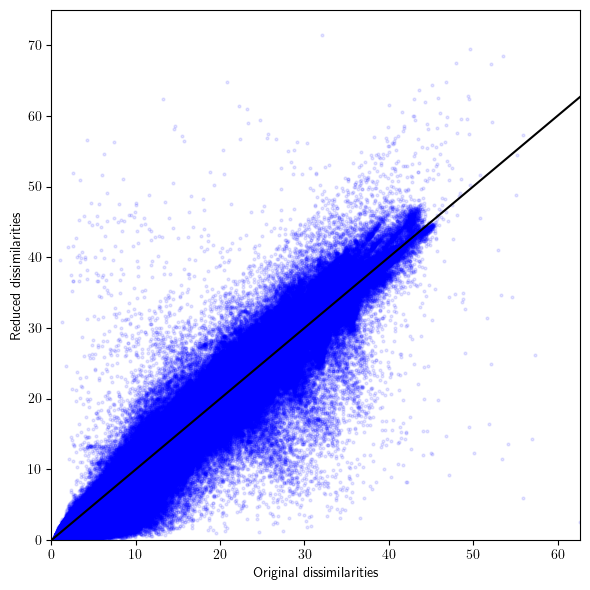

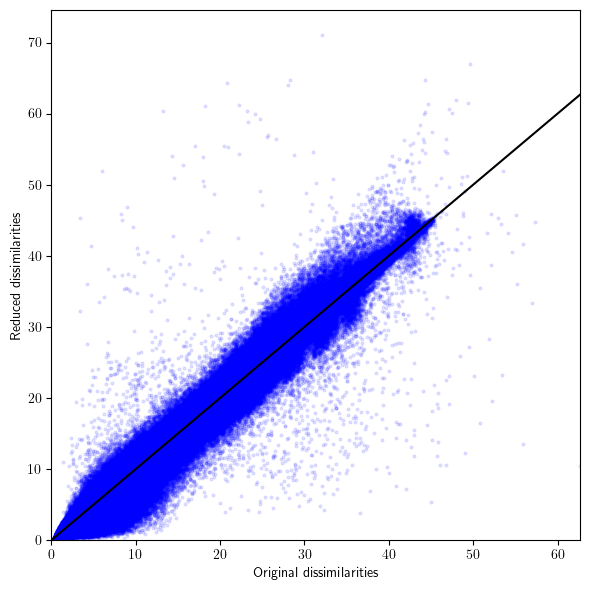

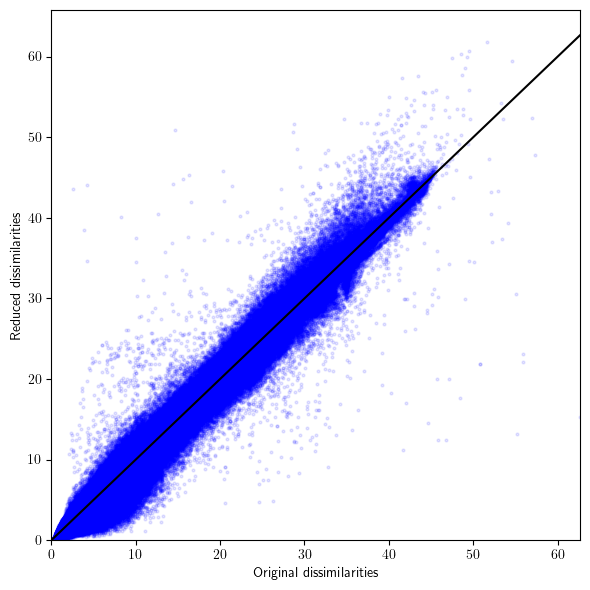

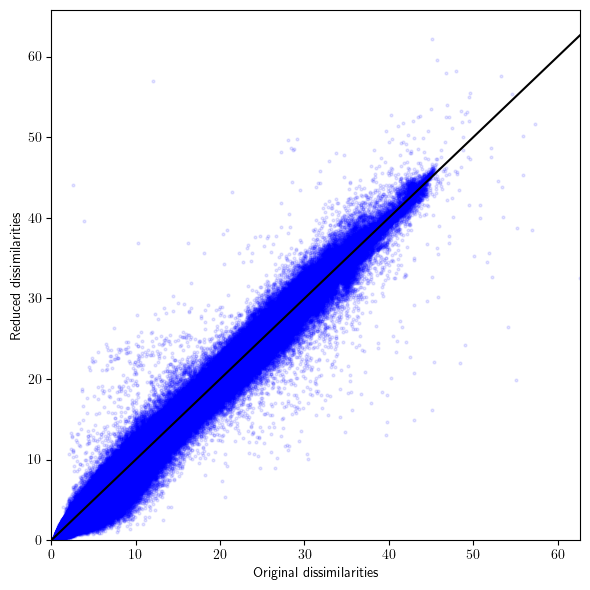

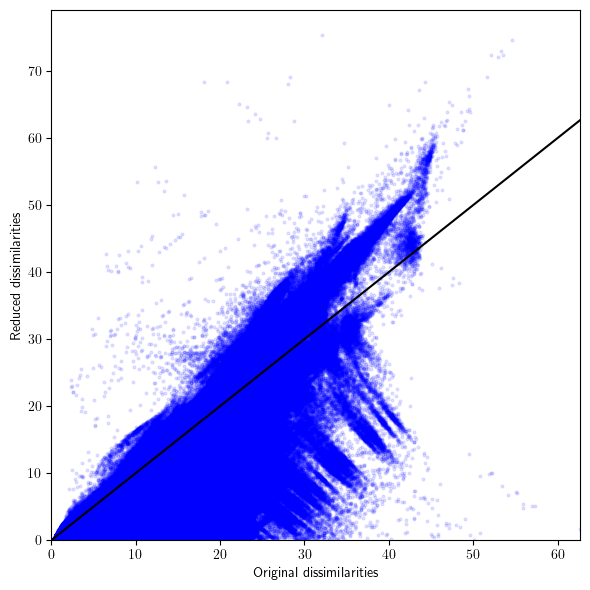

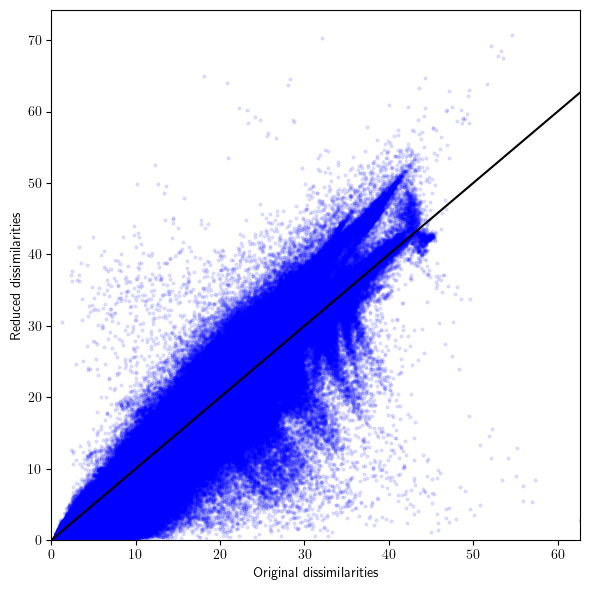

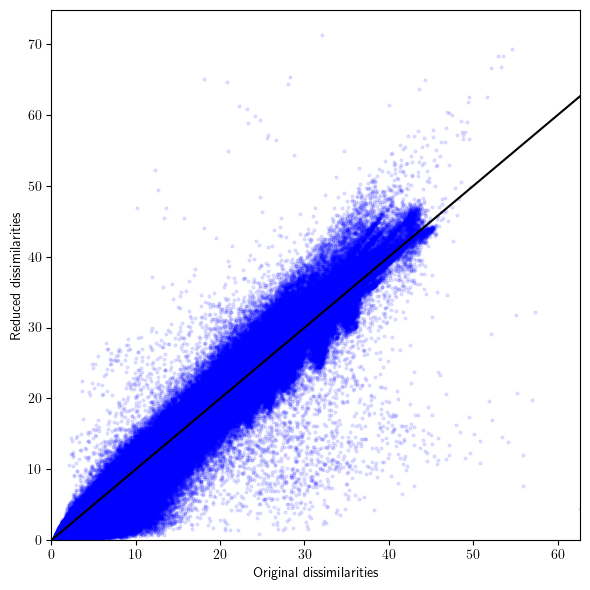

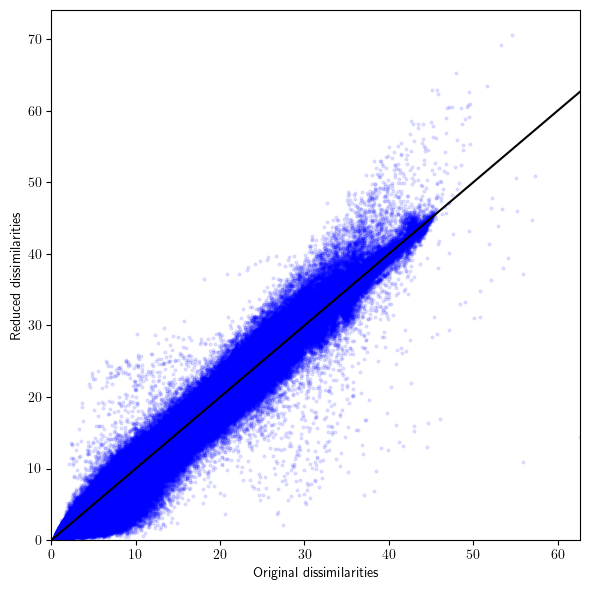

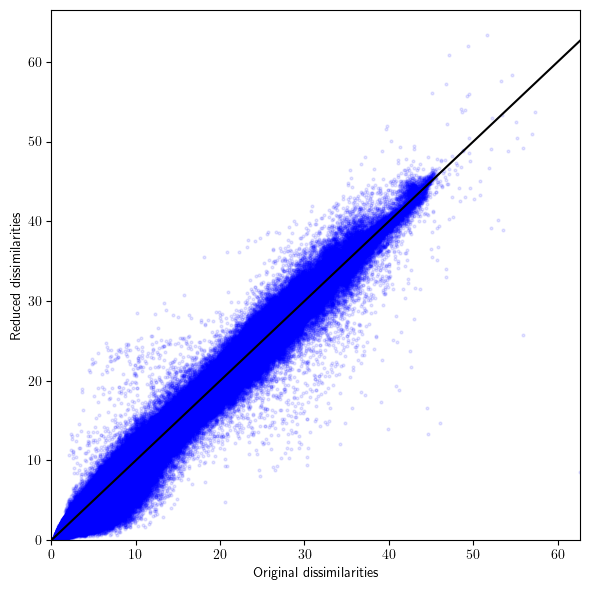

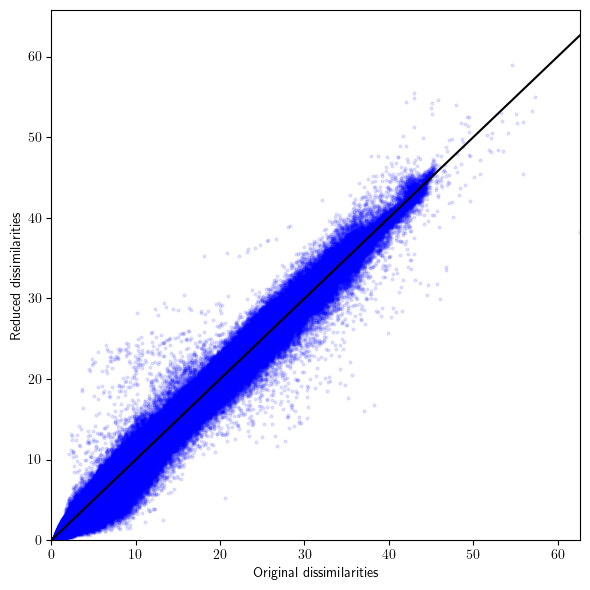

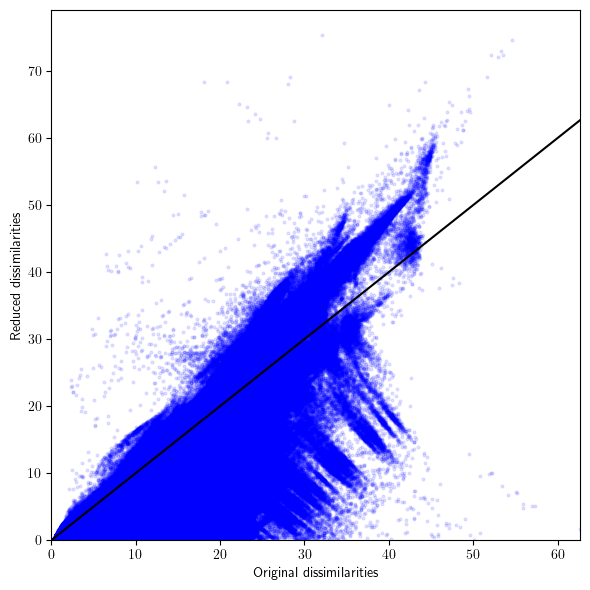

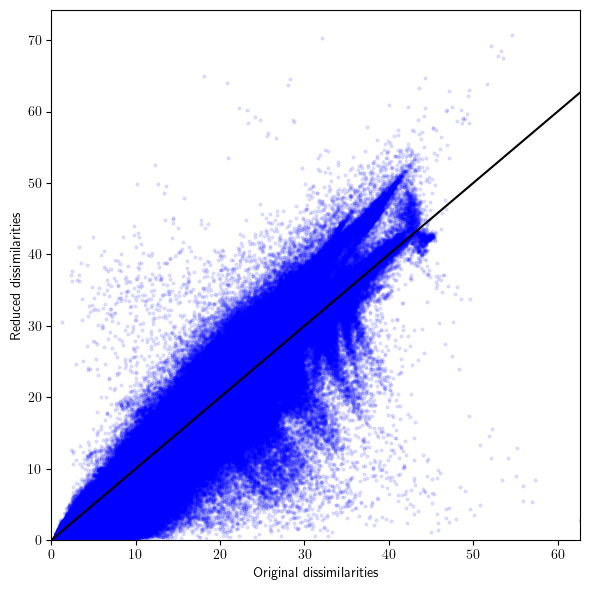

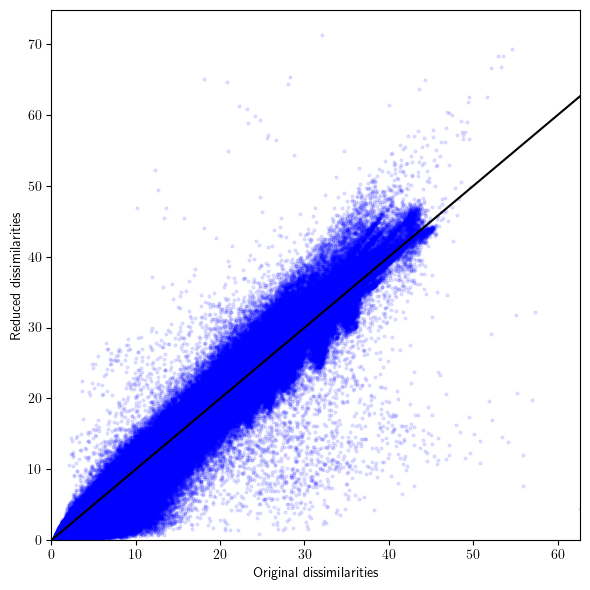

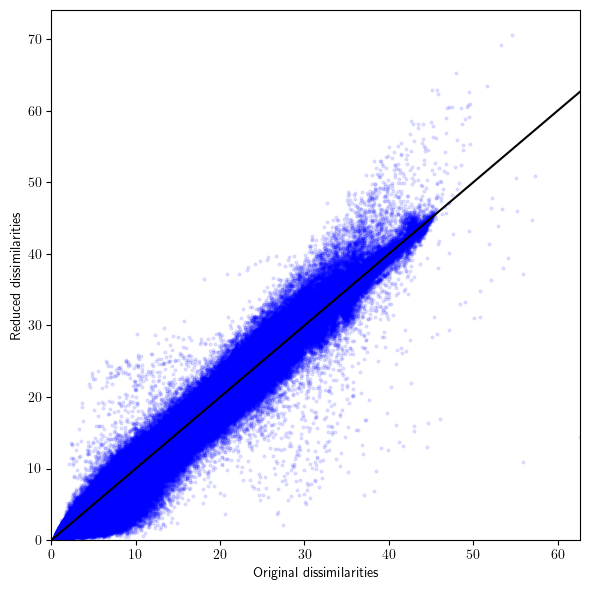

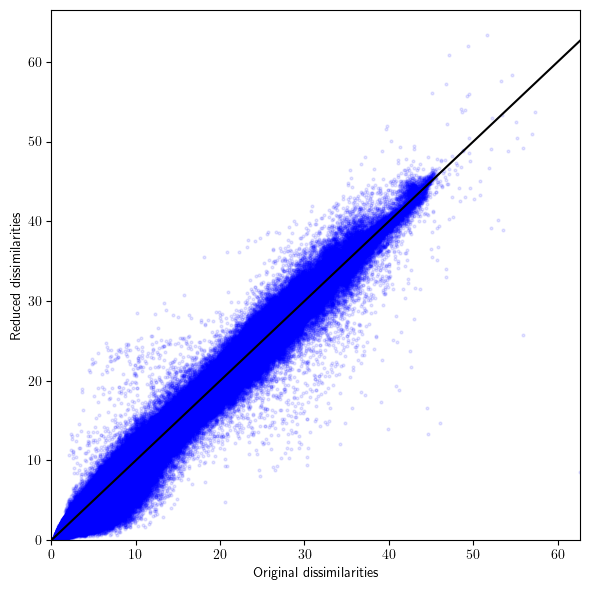

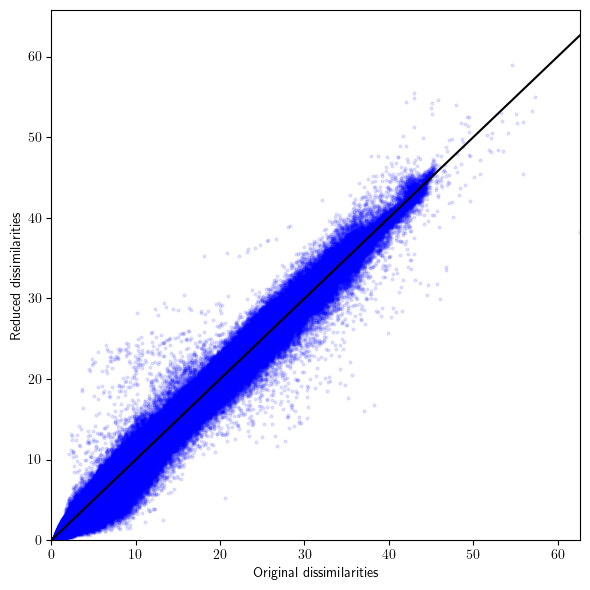

In [4]:
stress_by_procedure = dict()

for procedure in list_procedures:
    stress_by_procedure[procedure] = len(list_dimensions)*[0.0]
    for k, num_dim in enumerate(list_dimensions):
        stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = procedure, max_iter = max_iters, eps = eps, verbose = 1)
        stress_by_procedure[procedure][k] = stress

## Curvas Stress-1

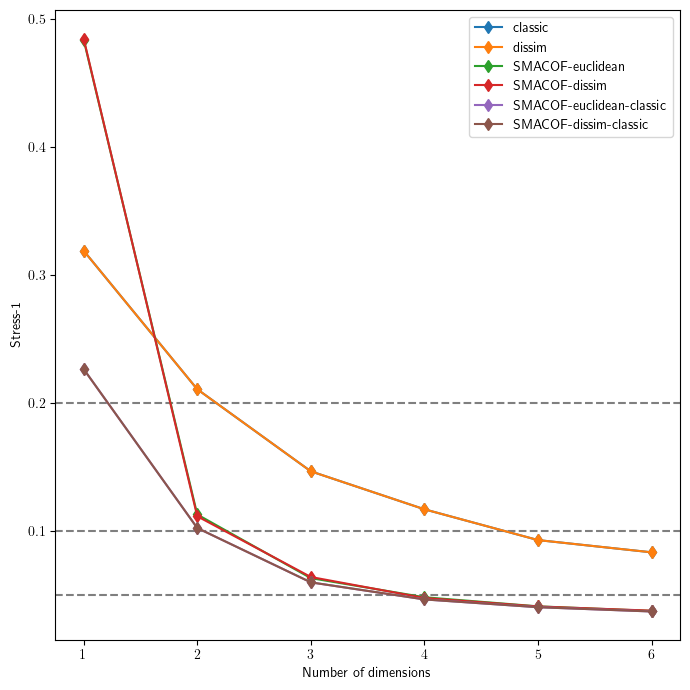

In [5]:
Figure, Subplot = subplots(1, 1, figsize = (7, 7))

for procedure in list_procedures:
    Subplot.plot(list_dimensions, stress_by_procedure[procedure], "-d", label =  procedure)
Subplot.axhline(y = 0.2, color = "black", linestyle = "--", alpha = 0.5, zorder = 0)
Subplot.axhline(y = 0.1, color = "black", linestyle = "--", alpha = 0.5, zorder = 0)
Subplot.axhline(y = 0.05, color = "black", linestyle = "--", alpha = 0.5, zorder = 0)
Subplot.set_xlabel("Number of dimensions")
Subplot.set_ylabel("Stress-1")
Subplot.legend()

Figure.tight_layout()

show()